In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud


df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


A coluna "review" no conjunto de dados IMDb Dataset contém textos das críticas feitas pelos usuários sobre filmes específicos. Cada entrada nessa coluna representa uma opinião escrita, variando em extensão e conteúdo, abordando aspectos como enredo, atuação, direção, entre outros elementos do filme. Essas críticas são fundamentais para análises de sentimentos e processamento de linguagem natural, sendo utilizadas para treinar modelos de aprendizado de máquina que classificam automaticamente o sentimento associado a cada crítica. A coluna "sentiment" indica a classificação atribuída pelo usuário à crítica, geralmente como "positive" ou "negative", facilitando a análise e a avaliação de desempenho dos modelos desenvolvidos.

In [31]:
print('Dimensão do conjunto de dados:  -> ', df.shape[0], 'observações ou comentários')

Dimensão do conjunto de dados:  ->  50000 observações ou comentários


O IMDb Dataset é um conjunto de dados amplamente utilizado na área de processamento de linguagem natural e análise de sentimentos. Consiste em avaliações de filmes coletadas do site IMDb, que incluem críticas de usuários atribuindo uma classificação numérica e um texto descritivo sobre sua opinião sobre o filme. O dataset geralmente é dividido em duas categorias principais: sentimentos positivos e negativos, com base na avaliação atribuída pelos usuários. Este conjunto de dados é frequentemente utilizado para treinar e avaliar modelos de aprendizado de máquina que visam identificar automaticamente o sentimento associado a uma avaliação de texto, sendo uma ferramenta fundamental para o desenvolvimento e teste de algoritmos de análise de sentimentos.

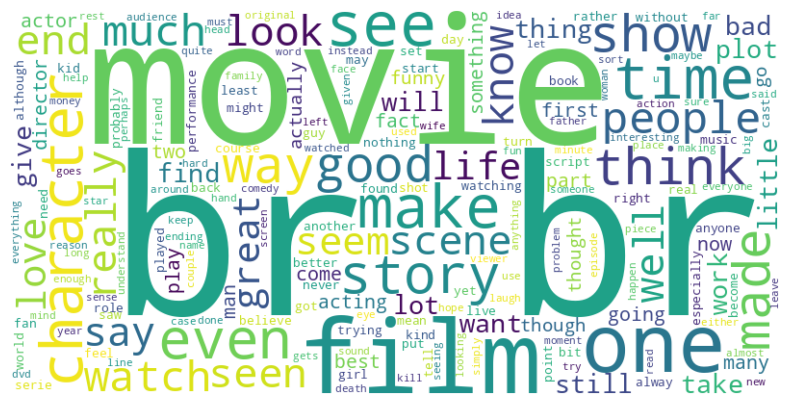

In [16]:
# Pré-processamento
# Remover pontuação e transformar em minúsculas
df['review'] = df['review'].str.replace('[^\w\s]', '').str.lower()



# Exibir uma wordcloud após o pré-processamento
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Uma Word Cloud (nuvem de palavras) é uma representação visual que exibe as palavras de um texto de forma que o tamanho de cada palavra é proporcional à sua frequência no texto. É uma ferramenta útil para análise exploratória de dados textuais, pois permite identificar rapidamente as palavras mais frequentes e proeminentes em um conjunto de dados. A Word Cloud é gerada a partir do processamento do texto original, onde são removidos caracteres especiais, transformadas em minúsculas e divididas em palavras individuais. Em seguida, as palavras são contadas e as mais frequentes são visualmente destacadas na nuvem, facilitando a identificação de padrões, temas ou tópicos principais presentes nos dados textuais.

In [17]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Vetorização dos textos com TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [24]:
# Construção do modelo MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_vect, y_train)

# Previsões no conjunto de teste
y_pred_test = clf.predict(X_test_vect)

# Métricas de avaliação
print(classification_report(y_test, y_pred_test))
print('\nClassificações - Amostra Teste:\n')
print(confusion_matrix(y_test, y_pred_test))




              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      4961
    positive       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Classificações - Amostra Teste:

[[4405  556]
 [ 809 4230]]


Os valores de recall de 0,89 para a classe "negative" e 0,84 para a classe "positive" indicam a proporção de exemplos corretamente identificados pelo modelo em relação ao total de exemplos verdadeiramente pertencentes a cada classe. O recall de 0,89 para a classe "negative" significa que o modelo capturou 89% das instâncias que são realmente negativas, enquanto o recall de 0,84 para a classe "positive" indica que o modelo identificou corretamente 84% das instâncias positivas. Esses resultados são importantes para avaliar a capacidade do modelo em distinguir entre sentimentos positivos e negativos com base nas métricas de avaliação do desempenho da classificação.

In [25]:
# Exemplo de uso do modelo para um novo comentário

novoComentario = "I hate this movie" #Note que o comentário deverá ser classificado como Negative, por conta da palavra hate
text_vectorized = vectorizer.transform([novoComentario]) #retorna um array com a classificação do modelo


prediction = clf.predict(text_vectorized)


print('Texto classificado como: ', prediction)

Texto classificado como:  ['negative']


In [26]:
# Salvar o modelo treinado com pickle, o que nos permite utilizar em alguma aplicação
import pickle

with open('nbModel.pkl', 'wb') as f:
    pickle.dump(clf, f)
